In [1]:
import TimeSliceImport
import RamanPlotTools as pt
from sklearn import (svm,metrics,preprocessing)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path="/Users/morten/Desktop/SKYP_KYP_SYP/"
start=201
end=1600
points=1000
numClasses=4
types=["yeast","PS","spore","kleb"]
spectra=TimeSliceImport.importData(path,types)
classes=list(map(lambda x:TimeSliceImport.RamanSample.mappings[x],types))
sortedTypesTuples=sorted(zip(types,classes),key=lambda x:x[1])
sortedTypes=[x[0] for x in sortedTypesTuples]


def scalarClassesFromOneHotArray(oneHotArray):
    return np.argmax(oneHotArray,axis=1)

def plotResult(truth,result, score):
    # pt.plotResult(scalarClassesFromOneHotArray(result),scalarClassesFromOneHotArray(truth),sortedTypes)
    pt.plotResult(result,truth,sortedTypes)
    # mtrx=metrics.confusion_matrix(scalarClassesFromOneHotArray(truth),scalarClassesFromOneHotArray(result))
    mtrx=metrics.confusion_matrix(truth,result)
    pt.plotConfusionMatrix(mtrx,sortedTypes,"Classification Result (%.03g )" % score)

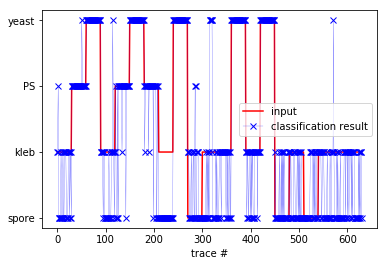

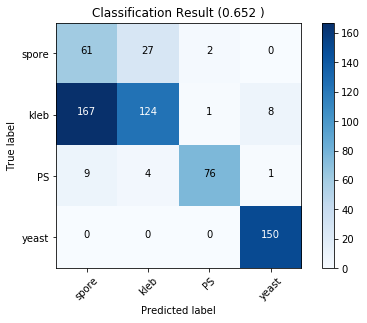

In [23]:

trainingData, trainingClasses, validationData, validationClasses=TimeSliceImport.prepareRandomData(spectraList=spectra,
                                                                                                    validationFraction=0.25,
                                                                                                    end=1600,
                                                                                                    start=201,
                                                                                                    points=1000,
                                                                                                    oneHot=False)
nuSVM = svm.NuSVC(nu=0.05, gamma=0.001, probability=True)
nuSVM.fit(trainingData, trainingClasses)
score=nuSVM.score(validationData,validationClasses)
pred=nuSVM.predict(validationData)
plotResult(validationClasses,pred,score)


Filter: none
Epoch 0.000000, Score: 0.758730
Epoch 1.000000, Score: 0.685714
Epoch 2.000000, Score: 0.549206
Epoch 3.000000, Score: 0.688889
Epoch 4.000000, Score: 0.684127
Epoch 5.000000, Score: 0.700000
Epoch 6.000000, Score: 0.682540
Epoch 7.000000, Score: 0.692063
Epoch 8.000000, Score: 0.711111
Epoch 9.000000, Score: 0.753968
Epoch 10.000000, Score: 0.619048
Epoch 11.000000, Score: 0.636508
Epoch 12.000000, Score: 0.606349
Epoch 13.000000, Score: 0.714286
Epoch 14.000000, Score: 0.680952
Epoch 15.000000, Score: 0.650794
Epoch 16.000000, Score: 0.680952
Epoch 17.000000, Score: 0.636508
Epoch 18.000000, Score: 0.677778
Epoch 19.000000, Score: 0.726984
0.6768253968253967


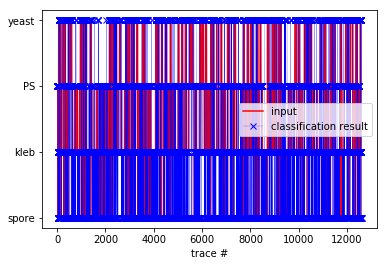

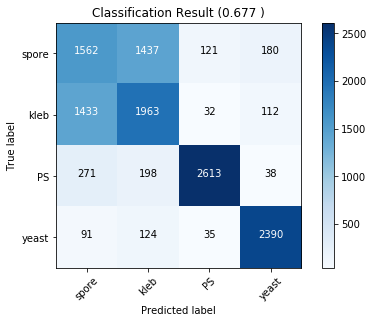

Filter: BOTTOMSDEV
Epoch 0.000000, Score: 0.650794
Epoch 1.000000, Score: 0.685714
Epoch 2.000000, Score: 0.647619
Epoch 3.000000, Score: 0.666667
Epoch 4.000000, Score: 0.800000
Epoch 5.000000, Score: 0.612698
Epoch 6.000000, Score: 0.666667
Epoch 7.000000, Score: 0.584127
Epoch 8.000000, Score: 0.577778
Epoch 9.000000, Score: 0.650794
Epoch 10.000000, Score: 0.593651
Epoch 11.000000, Score: 0.568254
Epoch 12.000000, Score: 0.717460
Epoch 13.000000, Score: 0.711111
Epoch 14.000000, Score: 0.730159
Epoch 15.000000, Score: 0.650794
Epoch 16.000000, Score: 0.590476
Epoch 17.000000, Score: 0.707937
Epoch 18.000000, Score: 0.682540
Epoch 19.000000, Score: 0.666667
0.6580952380952378


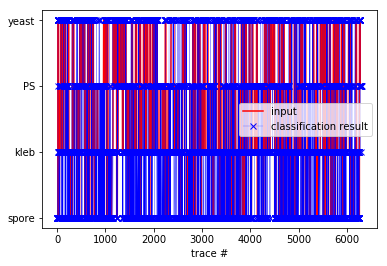

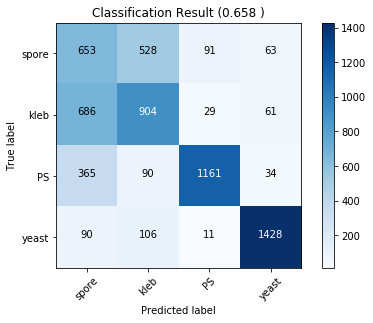

Filter: TOPSDEV
Epoch 0.000000, Score: 0.685714
Epoch 1.000000, Score: 0.606349
Epoch 2.000000, Score: 0.739683
Epoch 3.000000, Score: 0.536508
Epoch 4.000000, Score: 0.695238
Epoch 5.000000, Score: 0.685714
Epoch 6.000000, Score: 0.758730
Epoch 7.000000, Score: 0.800000
Epoch 8.000000, Score: 0.720635
Epoch 9.000000, Score: 0.749206
Epoch 10.000000, Score: 0.787302
Epoch 11.000000, Score: 0.714286
Epoch 12.000000, Score: 0.755556
Epoch 13.000000, Score: 0.717460
Epoch 14.000000, Score: 0.628571
Epoch 15.000000, Score: 0.796825
Epoch 16.000000, Score: 0.780952
Epoch 17.000000, Score: 0.758730
Epoch 18.000000, Score: 0.793651
Epoch 19.000000, Score: 0.742857
0.7226984126984128


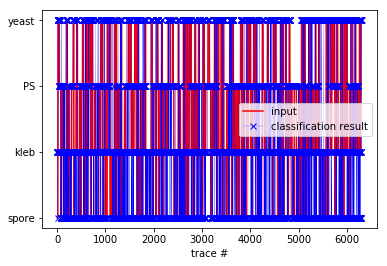

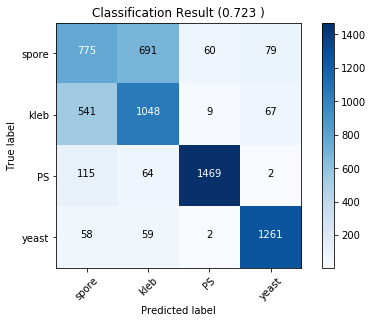

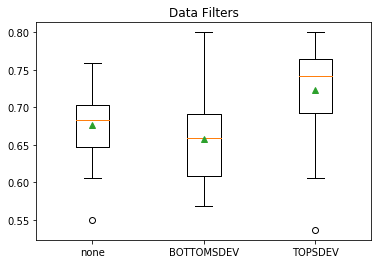

In [7]:
results=[]
labels=[]

for filter in ["none", "BOTTOMSDEV","TOPSDEV"]:
    numEpochs=20
    scores=[]
    truthData=[]
    resultData=[]
    labels.append(str(filter))
    print("Filter: {}".format(filter))
    
    for i in  range(numEpochs):
        trainingData, trainingClasses, validationData, validationClasses=TimeSliceImport.prepareRandomData(spectraList=spectra,
                                                                                                        validationFraction=0.25,
                                                                                                    end=1600,
                                                                                                    start=201,
                                                                                                    points=1000,
                                                                                                    oneHot=False,
                                                                                                    filter=filter)
        nuSVM = svm.NuSVC(nu=0.05, gamma=0.01, probability=True)
        nuSVM.fit(trainingData, trainingClasses)
        score=nuSVM.score(validationData,validationClasses)
        scores.append(score)
        pred=nuSVM.predict(validationData)
        resultData.extend(pred)
        truthData.extend(validationClasses)
        print("Epoch %f, Score: %f" %(i, score))
    
    avgScore=sum(scores)/float(len(scores))
    print(avgScore)
    plotResult(truthData,resultData,avgScore)
    results.append(scores)
    
npScores=np.array(results)
plt.boxplot(np.transpose(npScores), labels=labels, showmeans=True)
plt.title("Data Filters")
plt.show()